In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
df = pd.read_csv('VeinteDatos.csv')
df.fillna({'Salario': df['Salario'].mean()}, inplace=True)
display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23.0,50000.000000,2020-01-10
1,2,Luis,35.0,60000.000000,2019-06-15
2,3,Carlos,30.0,61764.705882,2020-03-25
3,4,María,22.0,58000.000000,NaN
4,5,Elena,28.0,49000.000000,2018-07-30
5,6,Jorge,NaN,62000.000000,2017-09-14
6,7,Sofía,34.0,72000.000000,2016-11-22
7,8,Andrés,45.0,61000.000000,2021-04-01
8,9,Laura,29.0,52000.000000,2015-05-19
9,10,Pedro,41.0,67000.000000,2014-08-25


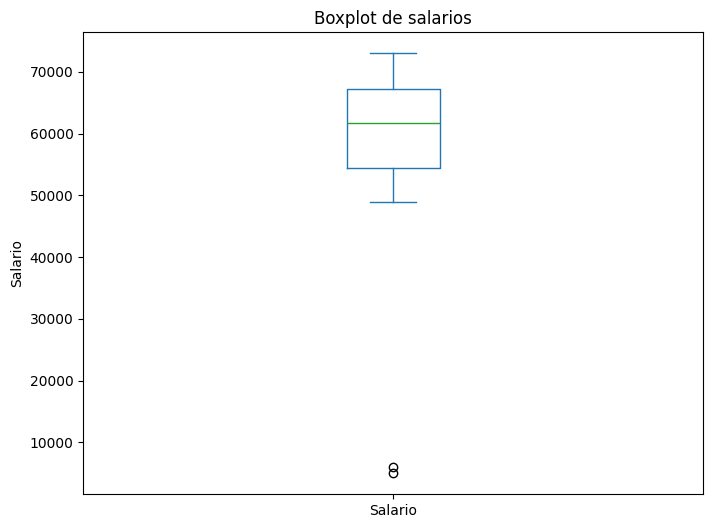

In [11]:
#modifico valores para tener valores atipicos
df.loc[df['ID'] == 1, 'Salario'] = 5000
df.loc[df['ID'] == 2, 'Salario'] = 6000
#los valores atipicos son valores que se desvian significativamente de la tendencia que tienen los datos
#diagrama de cajas para identificar valores atipicos visualmente
plt.figure(figsize=(8,6))
df['Salario'].plot(kind='box')
plt.title('Boxplot de salarios')
plt.ylabel('Salario')
plt.show()

In [13]:
#rangos intercuartilicos para indentificar datos atipicos
Q1 = df['Salario'].quantile(0.25)
Q3 = df['Salario'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identificacion de datos atipicos
outliers = df[(df['Salario'] < lower_bound) | (df['Salario'] > upper_bound)]
#outliers es datos atipicos en ingles
#con este metodo puedo visualizar que datos exactos son outliers
display(outliers)

,ID,Nombre,Edad,Salario,Fecha_Ingreso
0,1,Ana,23.0,5000.0,2020-01-10
1,2,Luis,35.0,6000.0,2019-06-15


In [17]:
#metodo z-score
#indica cuantas desviaciones estandar esta un punto por encima o bajo de la media
#se usa la libreria scipy
df['Z_Score'] = stats.zscore(df['Salario'])
display(df)

,ID,Nombre,Edad,Salario,Fecha_Ingreso,Z_Score
0,1,Ana,23.0,5000.000000,2020-01-10,-2.831908
1,2,Luis,35.0,6000.000000,2019-06-15,-2.777253
2,3,Carlos,30.0,61764.705882,2020-03-25,0.270540
3,4,María,22.0,58000.000000,NaN,0.064782
4,5,Elena,28.0,49000.000000,2018-07-30,-0.427109
5,6,Jorge,NaN,62000.000000,2017-09-14,0.283400
6,7,Sofía,34.0,72000.000000,2016-11-22,0.829945
7,8,Andrés,45.0,61000.000000,2021-04-01,0.228745
8,9,Laura,29.0,52000.000000,2015-05-19,-0.263145
9,10,Pedro,41.0,67000.000000,2014-08-25,0.556672


In [19]:
#si el valor absoluto del zscore es mayor a 3, se considera outlier
outliers_zscore = df[df['Z_Score'].abs() > 3]
display(outliers_zscore)

,ID,Nombre,Edad,Salario,Fecha_Ingreso,Z_Score
